In [467]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

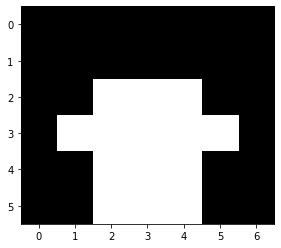

In [468]:
donut = np.array([[0,0,0,0,0,0,0],[0,0,1,1,1,0,0],[0,1,1,0,1,1,0],[0,1,1,0,1,1,0],[0,0,1,1,1,0,0],[0,0,0,0,0,0,0]])
house = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,1,1,1,0,0],[0,1,1,1,1,1,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0]])
square = np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0],[0,0,1,1,1,0,0]])
plt.imshow(house,cmap='gray')

In [555]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import random

block_color_set = ['black']
pokemon = ["#ff0000","#f6bd20","#9c5200","#de9400","#623108","#62d5b4","#83eec5","#184a4a","#73ac31","#e65a41","#29739c"]
random.shuffle(pokemon)
block_color_set += pokemon
maskmap = ListedColormap(block_color_set,N=11)
#norm = BoundaryNorm(list(range(12)), 11)


In [805]:
def weirdHouse():
    new_sq = square.copy()
    i = 0
    while random.random() < 0.75 and i < 10:
        c = random.randint(0,6)
        r = random.randint(1,4)
        new_sq[r,c] = 1
        i+=1
    return new_sq

def colorHouse():
    cs = list(range(1,11))
    random.shuffle(cs)
    canvas = np.zeros((6,7))
    #rows
    for x in range(7):
        canvas[4:,x] = random.choice(cs[2:-1])
    #any above
    for x in range(7):
        for y in [0,1]:
            canvas[y,x] = random.choice(cs[1:])
    canvas[np.where(square==1)] = cs[0] #color base
    canvas[5,1] = cs[0]
    canvas[5,5] = cs[0]
    canvas[3,:] = cs[-1]  #top
    for x in range(7):
        canvas[2,x] = random.choice(cs[-3:])
        
    return canvas
    
def showMask(mask,img,debug=False):
#     v = np.unique(img)
#     v = list(range(11))
#     norm = BoundaryNorm(v, len(v)-1)
    
    c = ['gray',maskmap,maskmap]
    m = [mask,img, mask*img]
    n = [None,norm,norm]
    
    plt.figure(figsize=(5,2))
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.xticks([])
        plt.yticks([])
        #plt.imshow(np.array(m[i]).squeeze(),cmap=c[i],norm=n[i])
        plt.imshow(np.array(m[i]).squeeze(),cmap=c[i],vmin=0,vmax=(10 if i > 0 else 1))
    plt.show()
    
    if debug:
        print(img)
        print(mask*img)
     
    
#assum 6x7 shape
def encode(l):
    b = np.zeros((6,7,11))
    for i in range(42):
        c = i%6
        r = i//7
        v = int(l[r,c])
        b[r,c,v]=1
    return b

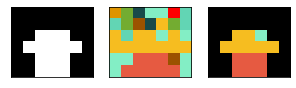

In [806]:
#level = np.random.randint(12, size=(6, 7))
level = colorHouse()
showMask(house,level)

In [807]:
#make lots of weird houses as training data
NUM_HOUSES = 2500
X_dat = []
y_dat = []
y_dat2 = []
for i in range(NUM_HOUSES):
    mask_house = weirdHouse()
    bin_house = np.expand_dims(mask_house,axis=-1)
    full_color = colorHouse()
    #full_color = np.random.randint(12, size=(6, 7))
    cat_house = full_color*bin_house.squeeze()
    cat_house2 = encode(cat_house)
    
    X_dat.append(bin_house)
    y_dat.append(full_color)
    y_dat2.append(cat_house2)
    
X_dat = np.array(X_dat)
y_dat = np.array(y_dat)
y_dat2 = np.array(y_dat2)

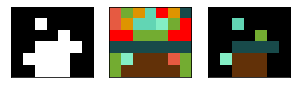

[[ 3.  4. 10.  7.  6. 10.  9.]
 [ 3. 10.  7.  7.  5.  4.  6.]
 [ 6.  6.  4.  4.  4.  6.  6.]
 [ 9.  9.  9.  9.  9.  9.  9.]
 [ 4.  5.  2.  2.  2.  3.  4.]
 [ 4.  2.  2.  2.  2.  2.  4.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 7. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0.]
 [0. 0. 9. 9. 9. 9. 0.]
 [0. 5. 2. 2. 2. 0. 0.]
 [0. 0. 2. 2. 2. 0. 0.]]


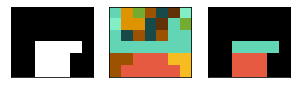

[[ 7. 10.  4.  1.  9.  2.  5.]
 [ 5. 10. 10.  9.  2.  7.  4.]
 [ 7.  9.  1.  9.  1.  7.  7.]
 [ 7.  7.  7.  7.  7.  7.  7.]
 [ 1.  1.  3.  3.  3.  8.  8.]
 [ 1.  3.  3.  3.  3.  3.  8.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 7. 7. 7. 7. 0.]
 [0. 0. 3. 3. 3. 0. 0.]
 [0. 0. 3. 3. 3. 0. 0.]]


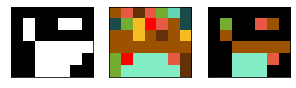

[[1. 3. 2. 3. 4. 7. 9.]
 [9. 4. 8. 6. 3. 1. 9.]
 [1. 1. 8. 1. 2. 1. 8.]
 [1. 1. 1. 1. 1. 1. 1.]
 [4. 6. 5. 5. 5. 3. 2.]
 [4. 5. 5. 5. 5. 5. 2.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 3. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 5. 5. 5. 3. 0.]
 [0. 0. 5. 5. 5. 0. 0.]]


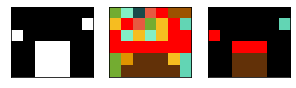

[[ 4.  5.  9.  3.  6.  1.  1.]
 [ 8.  6.  3.  4.  8.  6.  7.]
 [ 6.  5.  8.  5.  8.  6.  6.]
 [ 6.  6.  6.  6.  6.  6.  6.]
 [ 4. 10.  2.  2.  2.  8.  7.]
 [ 4.  2.  2.  2.  2.  2.  7.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 7.]
 [6. 0. 0. 0. 0. 0. 0.]
 [0. 0. 6. 6. 6. 0. 0.]
 [0. 0. 2. 2. 2. 0. 0.]
 [0. 0. 2. 2. 2. 0. 0.]]


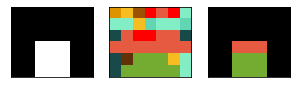

[[10.  8.  1.  6.  3.  6.  5.]
 [ 5.  5.  8.  7.  5.  5.  7.]
 [ 9.  3.  6.  6.  3.  3.  9.]
 [ 3.  3.  3.  3.  3.  3.  3.]
 [ 9.  2.  4.  4.  4.  8.  5.]
 [ 9.  4.  4.  4.  4.  4.  5.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 3. 3. 0. 0.]
 [0. 0. 4. 4. 4. 0. 0.]
 [0. 0. 4. 4. 4. 0. 0.]]


In [808]:
#show a few
for i in range(5):
    rh = random.choice(range(NUM_HOUSES))
    showMask(X_dat[rh].squeeze(),y_dat[rh])
    print(y_dat[rh])
    print(X_dat[rh].squeeze()*y_dat[rh])

In [809]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D
from keras import backend as K


#train the masking model
maskModel = Sequential()
maskModel.add(Input(shape=(6,7,1)))
maskModel.add(Conv2D(32,2,activation="relu", padding="same"))
maskModel.add(Conv2D(16,2,activation="relu", padding="same"))
maskModel.add(Conv2D(11,2,activation="sigmoid", padding="same"))
maskModel.add(Dense(11,activation="sigmoid"))

def mask_loss(y_true,y_pred):
    zero = tf.constant(0, dtype=tf.float32)
    y_true2 = tf.cast(y_true,tf.float32)
    y_pred2 = tf.cast(y_pred,tf.float32)
    mask = tf.cast(tf.where(tf.not_equal(y_true2, zero),1,0),tf.float32)
    mask_pred = tf.math.multiply(y_pred2,mask)
    #return -(97.0 * y_true2 * K.log(mask_pred) + 3.0 * (1.0 - y_true2) * K.log(1.0 - mask_pred)) / 100.0 #wbce
    #return tf.math.reduce_mean(tf.math.abs(y_true2 - tf.math.multiply(y_pred2,mask)) )   #mse
    return tf.losses.mean_squared_error(y_true2,mask_pred)
maskModel.compile(optimizer='adam',loss=mask_loss)
maskModel.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_169 (Conv2D)         (None, 6, 7, 32)          160       
                                                                 
 conv2d_170 (Conv2D)         (None, 6, 7, 16)          2064      
                                                                 
 conv2d_171 (Conv2D)         (None, 6, 7, 11)          715       
                                                                 
 dense_53 (Dense)            (None, 6, 7, 11)          132       
                                                                 
Total params: 3,071
Trainable params: 3,071
Non-trainable params: 0
_________________________________________________________________


In [810]:
maskModel.fit(X_dat,y_dat2,epochs=20,batch_size=16,verbose=True)

Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 0.0051
Epoch 2/20
157/157 [==============================] - 0s 3ms/step - loss: 8.3674e-04
Epoch 3/20
157/157 [==============================] - 0s 3ms/step - loss: 3.7332e-04
Epoch 4/20
157/157 [==============================] - 1s 4ms/step - loss: 2.1817e-04
Epoch 5/20
121/157 [======================>.......] - ETA: 0s - loss: 1.5078e-04

KeyboardInterrupt: 

In [816]:
def showModelPred(model,bin_house,cat_house,debug=False):
    #get prediction, un-onehot, and apply mask
    pred_dat = np.argmax(model.predict(np.expand_dims(bin_house,axis=0),verbose=False).squeeze(),axis=-1)*bin_house.squeeze()
    comp_house = np.argmax(cat_house,axis=-1)
    
    #normalize colors
    #v = np.unique(np.hstack([comp_house,pred_dat]))
    v = list(range(11))
    norm = BoundaryNorm(v, len(v)-1)
    
    #setup
    labels = ["x","y","pred"]
    c = ['gray',maskmap,maskmap]
    m = [bin_house,comp_house,pred_dat]
    n = [None,norm,norm]
    
    
    #show
    plt.figure(figsize=(5,2))
    plt.axis('off')
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.axis('off')
        plt.imshow(np.array(m[i]).squeeze(),cmap=c[i],norm=n[i])
        plt.title(labels[i])
    plt.show()
    
    if debug:
        print(comp_house)
        print(pred_dat)

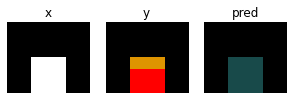

[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 10 10 10  0  0]
 [ 0  0  6  6  6  0  0]
 [ 0  0  6  6  6  0  0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]]


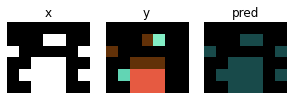

[[0 0 0 0 0 0 0]
 [0 0 0 2 5 0 0]
 [2 0 0 0 0 0 0]
 [0 0 2 2 2 0 0]
 [0 7 3 3 3 0 0]
 [0 0 3 3 3 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 9 9 0 0]
 [9 0 0 0 0 0 9]
 [0 0 9 9 9 0 0]
 [0 9 9 9 9 0 9]
 [0 0 9 9 9 0 0]]


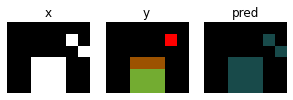

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 4 4 4 0 0]
 [0 0 4 4 4 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 9 0]
 [0 0 0 0 0 0 9]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]]


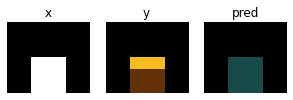

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 8 8 8 0 0]
 [0 0 2 2 2 0 0]
 [0 0 2 2 2 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]]


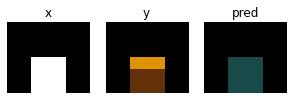

[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 10 10 10  0  0]
 [ 0  0  2  2  2  0  0]
 [ 0  0  2  2  2  0  0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]
 [0 0 9 9 9 0 0]]


In [817]:
#show some predictions
pickset = random.choices(range(len(X_dat)),k=5)
d = [(X_dat[i],y_dat2[i]) for i in pickset]
for di in d:
    showModelPred(maskModel,di[0],di[1],True)

In [701]:
#show distribution of values in the training dataset
uq,cts = np.unique(y_dat,return_counts=True)
tot = sum(cts)
for u,c in zip(uq,cts):
    print(f"{int(u)}: {c/tot:.4f}")
# cts2 = [0]
# for x in cts:
#     cts2.append(x)
# fig = plt.figure(figsize = (10, 5))
# plt.bar(list(range(11)),cts2)
# plt.show()


1: 0.0992
2: 0.1010
3: 0.0993
4: 0.0987
5: 0.0994
6: 0.1002
7: 0.1008
8: 0.1028
9: 0.1000
10: 0.0987


In [823]:
#simulate the loss
yi = y_dat2[2]
mi = maskModel.predict(np.expand_dims(X_dat[0],axis=0)).squeeze()


zero = tf.constant(0, dtype=tf.float32)
y_true2 = tf.cast(yi,tf.float32)
y_pred2 = tf.cast(mi,tf.float32)
mask = tf.cast(tf.where(tf.not_equal(y_true2, zero),1,0),tf.float32)
mask_pred = tf.math.multiply(y_pred2,mask)

print(mask)

ytr = tf.reshape(y_true2,(42,11))
mpr = tf.reshape(mask_pred,(42,11))

#print(ytr)
#print(mpr)

#print(ytr.shape,mpr.shape)
#print(K.log(mask_pred))  #can't work because log of 0 is inf
cce = tf.keras.losses.CategoricalCrossentropy()
cce(ytr,mpr).numpy()

#-(97.0 * y_true2 * K.log(mask_pred) + 3.0 * (1.0 - y_true2) * K.log(1.0 - mask_pred)) / 100.0 #wbce

1/1 [==============================] - 0s 19ms/step
tf.Tensor(
[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 

nan

In [813]:
#print(tf.reshape(tf.transpose(y_true2,perm=[0,2,1]),(42,11)))
for i in range(11):
    print(y_dat2[0][:,:,i])
    
print(np.reshape(y_dat2[0],(42,11)))
#print(np.argmax(yi,axis=-1))
#plt.imshow(np.argmax(yi,axis=-1),cmap=maskmap)

[[1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [812]:
cce = tf.keras.losses.CategoricalCrossentropy()

a = [[[0, 1,0], [0,0,0]], [[1, 0,1], [1,0,0]]]
b = [[[0.05, 0.95,0], [0.7,0,1]], [[0.9, 0.8,0.1], [0.1,0.5,0.4]]]
a2 = tf.reshape(a,(4,3))
b2 = tf.reshape(b,(4,3))  #(batches, classes)

print(np.array(a).shape)
print(a2.shape)
print(a2.numpy())
print(b2.numpy())
cce(a2,b2).numpy()

(2, 2, 3)
(4, 3)
[[0 1 0]
 [0 0 0]
 [1 0 1]
 [1 0 0]]
[[0.05 0.95 0.  ]
 [0.7  0.   1.  ]
 [0.9  0.8  0.1 ]
 [0.1  0.5  0.4 ]]


1.4843494

tf.Tensor(
[[0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 7 0 7 0 0]
 [0 0 7 9 5 0 0]
 [0 0 0 7 5 0 0]], shape=(6, 7), dtype=int64)


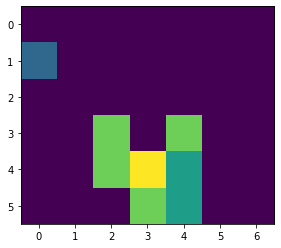

In [357]:
#un-hot encode
print(tf.math.argmax(yi,axis=-1))
plt.imshow(np.argmax(yi,axis=-1))

In [358]:
#test building a model
test = Sequential()
test.add(Dense(10,input_shape=(3,)))
test.add(Dense(1,activation='sigmoid'))
test.compile(loss='mse',optimizer='adam')
test.summary()

xt = np.random.rand(100,3)
yt = np.random.rand(100,1)
test.fit(xt,yt)

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                40        
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 2ms/step - loss: 0.1190


In [ ]:
mask_loss